# Spacy: Words Embeddings

<br>
<img src='https://i.imgur.com/dZ4f8sm.png'>
<br>

Ahora que ya sabemos como convertir nuestro texto a **tokens** (*Tokenizar*) y este pasarlo a **vectores** (*Words Embeddings*), ahora vamos a probar a visualizar unas cuantas palabras y estudiar su similitud a través de su proximidad.

---

**Tarea:** Implementa un método que tome como input un texto con un listado de palabras. Este método deberá procesar el texto para obtener de cada palabra un vector, y visualizar dichos vectores en 2D. En concreto:

- **1º** Procesa el texto con el listado de palabras utilizando SpaCy.
- **2º** Añade en un listado todos los vectores juntos.
- **3º** Procesa simultaneamente con PCA a todo el listado de vectores. 

> **Importante:** *(PCA se debe aplicar a todos los vectores conjuntamente para que el procesamiento sea igual para todos ellos.)*

- **4º** Visualiza utilizando un *scatterplot()* de Matplotlib los vectores bidimensionales que has obtenido. Puedes usar el método  *plt.annotate()* para añadir el texto informativo a cada punto visualizado.

In [ ]:
!pip install -U spacy
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 568.0 MB 9.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import spacy

# Cargamos el modelo grande en Español.
nlp = spacy.load("es_core_news_lg")

text = "gato perro ordenador manzana móvil dos tres cuatro"
# text1 = "cine teatro casa edificio rojo amarillo tierra agua máquina fuego aire"

# COMIENZA AQUÍ TU CÓDIGO #

def visualize_embeddings(text):
  doc = nlp(text)

  # ---- Usar Spacy para convertir el texto a vectores
  vectores = [token.vector for token in doc]

  # ---- Reducir la dimensionalidad con PCA.
  pca_vectors = PCA(n_components=2).fit_transform(vectores)
  # ---- Visualizar estos vectores con Matplotlib.
  for i in range(len(doc)):
    plt.scatter(pca_vectors[ i, 0],pca_vectors[ i, 1])
    plt.annotate(doc[i].text, xy=((pca_vectors[i,0]),(pca_vectors[i,1])))
  plt.show()


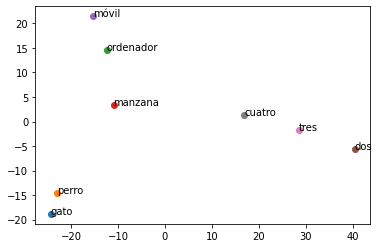

In [ ]:
visualize_embeddings(text)
# visualize_embeddings(text1)

# Recurrent Neural Networks.
##  Sentiment analysis with LSTM


<img width=500px src='https://gumlet.assettype.com/thequint/2022-03/ffb8b233-732d-41c5-82b9-84542cbb4895/snipping1.png'>
<br>


Ya conocemos cómo podemos codificar palabras con Embeddings y usar los vectores resultantes para su análisis con redes neuronales recurrentes (RNN), ahora vamos a ponerlo en práctica para generar un modelo de análisis de sentimiento.

En el código adjunto podrás encontrar todo los pasos necesarios para la carga y preprocesamiento del dataset, quedando pendiente de implementar el modelo clasificador.

---

**Tarea:** Implementa un modelo de análisis de sentimiento con Keras que esté compuesto de los siguientes elementos:

- Una capa de *Embeddings* que reduzca el tamaño del input a vectores de **tamaño 128.**
- Dos capas LSTM de 64 y 32 neuronas. Investiga el uso del atributo *return_sequences* para agregar más de una capa.
- Una capa Densa de salida que genere como output 0-1 según el sentimiento.

💡 **Una tasa de acierto superior a 85% será satisfactoria**


In [ ]:
import tensorflow
from tensorflow.keras.datasets import imdb

max_features = 88584  # Tamaño total de nuestro vocabulario.
max_len = 200         # Número máximo de tokens de una review.

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Cada review está codificada como un listado de índices de palabras.
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [ ]:
# Para algunos casos, nos interesará conocer qué palabra está asociada con qué índice.
imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
# Obtenemos el glosario de palabras del vocabulario.
vocab = tensorflow.keras.datasets.imdb.get_word_index()
 
# Generamos un diccionario inverso para poder decodificar también las frase.
index = {v: k for k, v in vocab.items()}

In [ ]:
import numpy as np
from tensorflow import keras

print(len(X_train), "Secuencias entrenamiento")
print(len(X_test),  "Secuencias de prueba")

# Preprocesamos todas las secuencias para que tengan una longitud máxima establecida.
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test  = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

25000 Secuencias entrenamiento
25000 Secuencias de prueba


In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers     import *
from tensorflow.keras.losses import *


#Crear modelo
model=Sequential()

model.add(Embedding(max_features,128))
model.add (LSTM (64, return_sequences = True)) 
model.add (LSTM (32, return_sequences = False)) 
model.add(Dense(2,activation='softmax'))

#Ver estructura de red
model.summary()

#Compilar modelo
model.compile(loss=SparseCategoricalCrossentropy(), 
              optimizer=Adam(),                # Usa el optimizador Adam
              metrics=['accuracy'])            # Usa la métrica de precisión

#Entrenar Modelo
model.fit(X_train, Y_train,
          batch_size=32,
          epochs=5,
          validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         11338752  
                                                                 
 lstm_14 (LSTM)              (None, None, 64)          49408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,400,642
Trainable params: 11,400,642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 94s 115ms/step - loss: 0.3862 - accuracy: 0.8271 - val_loss: 0.3590 - val_accuracy: 0.8490
Epoch 2/5
782/782 [===========

In [ ]:
# Puedes utilizar el siguiente método para, una vez entrenes a tu modelo, 
# clasificar el sentimiento del texto dado como input.

# test_txt = "Titanic is the worst movie I've ever seen"
spidermanreview = "Purely as a superhero film, this film has no comparison"

vectorized = [vocab.get(w, 0) + 3 for w in spidermanreview.split()]
vectorized = np.array(vectorized)
vectorized[vectorized > max_features] = 0
vectorized = keras.preprocessing.sequence.pad_sequences([vectorized], maxlen=max_len)

pred = model.predict(vectorized.reshape(1, -1))[0][0]

(pred, 'Positivo 😁') if pred > 0.5 else (pred, 'Negativo 😪')

(0.917851, 'Positivo 😁')

# Hugging Face: Fine-tuning to Transformers.


<img width=500px src="https://1.bp.blogspot.com/-qQryqABhdhA/XcC3lJupTKI/AAAAAAAAAzA/MOYu3P_DFRsmNkpjD9j813_SOugPgoBLACLcBGAsYHQ/w1200-h630-p-k-no-nu/h1.png">

**Tarea:** Ahora que ya conocemos cómo podemos trabajar con la librería de HuggingFace en combinación con Tensorflow, realiza un proceso de *fine-tuning* al modelo BERT sobre al dataset de reviews de películas IMDB para análisis de sentimiento. 

In [ ]:
!pip install datasets
!pip install transformers

     |████████████████████████████████| 325 kB 10.8 MB/s 
     |████████████████████████████████| 212 kB 48.5 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 1.1 MB 46.4 MB/s 
     |████████████████████████████████| 136 kB 14.9 MB/s 
     |████████████████████████████████| 127 kB 62.9 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 271 kB 62.2 MB/s 
     |████████████████████████████████| 144 kB 58.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 27.5 MB/s

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import numpy as np

In [ ]:
from datasets import load_dataset

dataset = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset["train"][np.random.randint(100)]

{'label': 0,
 'text': "Sometime in 1998, Saban had acquired the rights to produce a brand-new Ninja Turtles live-action series. Naturally, being a fan of the TMNT back in the day, this obviously peaked my interest. So when I started watching the show... to say I was disappointed by the end result is an understatement. Some time later (more like recently), I got a chance to revisit the series.<br /><br />First off, let's talk about some of the positives. They managed to re-create the Turtles' lair as it was last seen in the movies fairly well given the limited budget they threw in with this. There tends to be this darker atmosphere overall in terms of the sets and whatnot. And the Turtle suits, while not the greatest piece of puppetry and whatnot, were functional and seemed pretty sturdy for most of the action stuff that would follow in the series.<br /><br />People tend to complain about getting rid of Shredder quickly and replacing him with these original villains who could have easil

In [ ]:
from transformers import AutoTokenizer

# Importamos el tokenizador.
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
# Generamos una función para procesar cada input.
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Y mapeamos el dataset.
tokenized_datasets = dataset.map(tokenize_function, batched=True)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

In [ ]:
# Generamos los sets de entrenamiento y evaluación.
small_train_dataset = tokenized_datasets["train"].shuffle().select(range(1000))
small_eval_dataset  = tokenized_datasets["test"].shuffle().select(range(1000))

In [ ]:
from transformers import DefaultDataCollator

# Instanciamos un generador de batches para Tensorflow.
data_collator = DefaultDataCollator(return_tensors="tf")

In [ ]:
# Creamos el dataset de entrenamiento.
tf_train_dataset = small_train_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

# Creamos el dataset de prueba.
tf_validation_dataset = small_eval_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

# Cargamos el modelo BERT de la librería Hugging Face para clasificación en Tensorflow.
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Entrenamos al modelo.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=5)

Epoch 1/5
125/125 [==============================] - 172s 1s/step - loss: 0.6525 - sparse_categorical_accuracy: 0.7100 - val_loss: 0.4607 - val_sparse_categorical_accuracy: 0.7890
Epoch 2/5
125/125 [==============================] - 159s 1s/step - loss: 0.4246 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.3690 - val_sparse_categorical_accuracy: 0.8420
Epoch 3/5
125/125 [==============================] - 161s 1s/step - loss: 0.2424 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.3313 - val_sparse_categorical_accuracy: 0.8630
Epoch 4/5
125/125 [==============================] - 161s 1s/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9620 - val_loss: 0.4209 - val_sparse_categorical_accuracy: 0.8760
Epoch 5/5
125/125 [==============================] - 162s 1s/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9680 - val_loss: 0.3084 - val_sparse_categorical_accuracy: 0.8860
